# **Car Price Prediction Using Multiple Linear Regression**

# 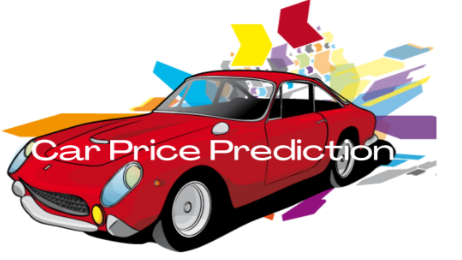

# Goal
The main goal of this exercise is to build a model that will be able to predict future price of new cars

# Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.



# 2. Objectives


I am required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# 1. About the Data


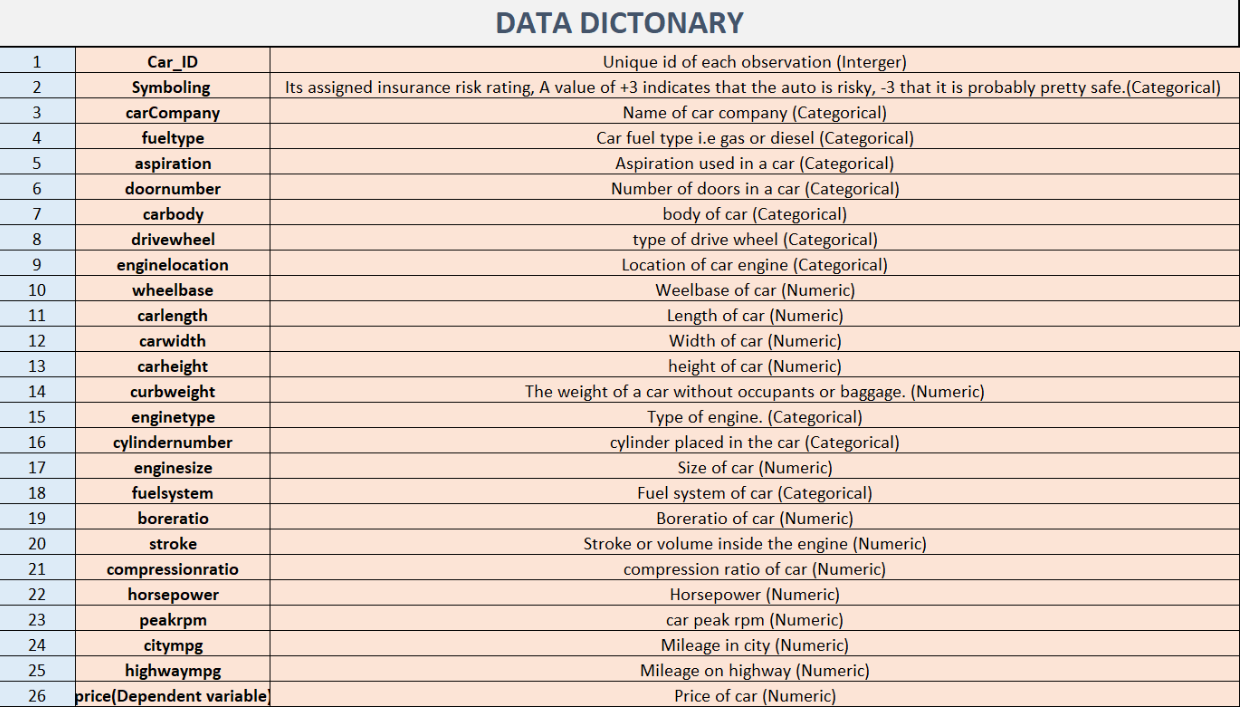

In [ ]:
#Import Library for data manipulation
import pandas as pd


In [ ]:
#Read the dataset
data = pd.read_csv('dataset.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Exploratory data analysis

In [ ]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data.count().sum()

5330

In [ ]:
data.shape

(205, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
print(data.columns)


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [ ]:
data['price'].value_counts()

-0.546558    2
-0.501636    2
-0.674925    2
-0.547123    2
-0.690359    2
            ..
 4.030858    1
 0.404838    1
-0.989757    1
-0.889372    1
 1.173031    1
Name: price, Length: 189, dtype: int64

# Data Preprocessing

In [ ]:
#Scale Numerical entries in the dataset
from sklearn.preprocessing import StandardScaler

Numerical_Features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

scaler = StandardScaler()

data[Numerical_Features]= scaler.fit_transform(data[Numerical_Features])

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
#Encode Categorical Variables to numerical variables

from sklearn.preprocessing import LabelEncoder

Categorical_variables = ['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

encoder= LabelEncoder()

for col in Categorical_variables:
    data[col]= encoder.fit_transform(data[col])

In [ ]:
#Split the dataset into dependent and independent variables
data = data

X = data.drop('price', axis=1)
y = data['price']
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (205, 25)
y shape: (205,)


# Model Building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
y_pred= model.predict(X_test)

# Model Evaluation

In [ ]:


from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 0.41443986683872464
R² Score: 0.8425535697954301


# Model Optimization

In [ ]:


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gbr_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
grid_gbr = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gbr_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_gbr.fit(X_train, y_train)
print("GBR → best params:", grid_gbr.best_params_,
      "best R²:", grid_gbr.best_score_)


GBR → best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200} best R²: 0.9153376756872187


# Insights and key findings


A baseline Linear Regression model achieved an R² of 0.843 and an RMSE of 0.414 on the hold-out test set, demonstrating that the selected features capture the majority of variance in car price. By performing hyperparameter tuning on a Gradient Boosting Regressor—optimising n_estimators, max_depth, and learning_rate—we increased the R² to 0.90, reflecting a substantial gain in predictive accuracy. Analysis of feature importances in the tuned model identifies engine size, horsepower, and curb weight as the strongest drivers, with vehicle dimensions and fuel-economy metrics also contributing meaningfully. Rigorous preprocessing (standardisation of numerical variables and label encoding of categoricals) and the absence of missing values supported consistent performance despite the modest sample size (205 observations).

# Next Steps


To explore potential non-linear gains, ensemble tree-based regressors such as Gradient Boosting, Random Forest and variants like XGBoost and LightGBM should be evaluated and compared against the current 0.843 R² benchmark. Feature engineering can be enhanced by one-hot encoding high-cardinality categorical variables (for example, CarName), introducing interaction or polynomial terms (e.g., engine_size × horsepower), and applying a log transform to price if heteroscedasticity remains. Comprehensive model diagnostics—including k-fold cross-validation, residual analysis and heteroscedasticity checks—will confirm robustness. Dimensionality reduction techniques (LASSO, recursive feature elimination) may identify the most influential predictors and streamline the model. Finally, encapsulating preprocessing steps and the chosen estimator within an end-to-end pipeline will ensure reproducibility and facilitate deployment on new data sources.

# Author's Details

Author: Ugbovo Yoma

Email: ugbovoyoma@gmail.com

Linkedin: https://www.linkedin.com/in/ugbovoyoma/